# ENPH 213 - Week 10 Lab

In this lab, we will be working on numerically solving partial differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab10, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-3 will be marked together (Weighted out of 10).

In [1]:
# Import all Needed Libraries

import numpy as np
import cmath as cm
import math as m
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import animation


# Part 1

Write a function that solves Laplace's equation $\nabla^2 V = 0$ and plots the electric potential of a parallel  plate capacitor placed inside a conducting box as shown in the diagram below.  The top plate of the capacitor is held at +10 Volts while the bottom plate is held at ‐10 Volts.  The box is grounded (0 Volts). Use a grid with 1 mm spacing in both directions give a total array size of 41x41 points. You will need to use the relaxation method to solve for the potential $V$ and will have to determine the number of iterations that are required for your solution to converge.

Hint: When needed, solve the "ODE" equations with the plates as boundary conditions.

Contour Plot!

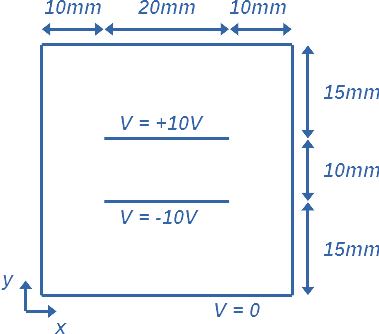

220 iterations are required for the solution to converge.


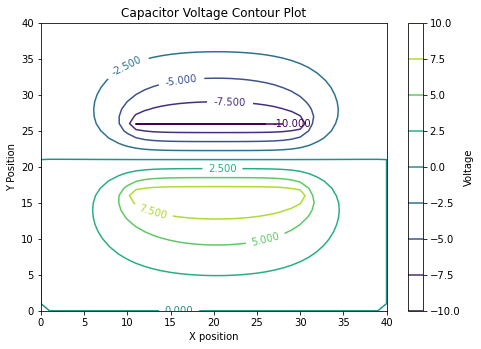

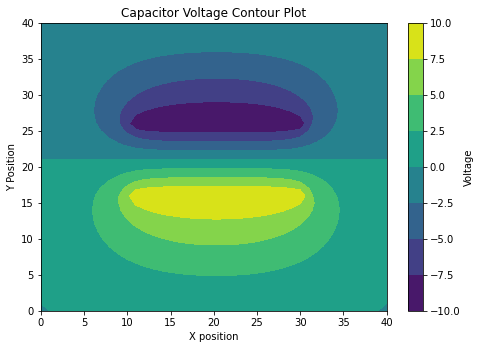

In [2]:
# initalize the boundary conditions
N = 41 # number of points
index = N-1
x = np.linspace(0, 40, 41)  # initialize x and y points
y = np.linspace(0, 40, 41)

V = np.zeros([x.size, y.size])  # Initialize voltage grid


def convergence(x,y,V,N):
    V1 = 10       # initilizing V1, with a arbitrary value
    index = N-1   # set a var to the index to iterate to
    
    for convergence_num in range(10000):   # Loop until V1 and V2 converge
        
        for ix in range(1, index):
            # Set the values of the capacitor
            V[16, 11:31] = 10
            V[26, 11:31] = -10
            
            for jy in range(1, index):
                V[ix, jy] = (V[ix+1, jy] + V[ix-1, jy] + V[ix, jy+1] + V[ix, jy-1])/4
                
        if convergence_num > 100:        # Begin testing convergence after 100 cycles
            V2 = V[(index)//4, (index)//2]  # [10, 20] is the point, it is far from any fixed values
            
            if abs(V2 - V1) < 0.001 :
                break
            V1 = V2   # Update the value from the last loop for the next convergence test
        
    print(convergence_num, "iterations are required for the solution to converge.")
    return V

V = convergence(x,y,V,N)

fig = plt.figure()                 # Plot the solid contour chart of the voltage
fig.add_axes([0, 0, 1, 1])
mycmap2 = plt.get_cmap('viridis')
contour = plt.contour(x, y, V, cmap = mycmap2)
fig.colorbar(contour, label = "Voltage")
plt.clabel(contour)
plt.title('Capacitor Voltage Contour Plot')
plt.xlabel("X position")
plt.ylabel("Y Position")
plt.show()

fig = plt.figure()                 # Plot the solid contour chart of the voltage
fig.add_axes([0, 0, 1, 1])
contour = plt.contourf(x, y, V)
fig.colorbar(contour, label = "Voltage")
plt.title('Capacitor Voltage Contour Plot')
plt.xlabel("X position")
plt.ylabel("Y Position")
plt.show()

# Part 2

Plot the electric field of the configuration.  To do this, you can either use your function developed in Week 3 or you may also use Numpy's gradient() function.

Plot the electric field using a quiver plot as you did in Week 3.

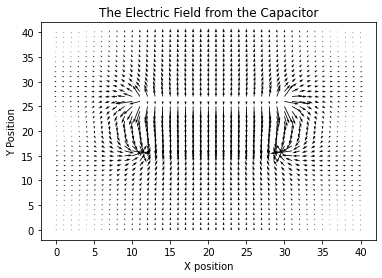

In [3]:
# Using the code from Lab 3 with the voltage data
dervData = np.gradient(V) # partial derivative calc using V
dervX = dervData[1] # partial derivative in x (Ex)
dervY = dervData[0] # partial derivative in y (Ey)

plt.quiver(x, y, dervX, dervY)
plt.title("The Electric Field from the Capacitor")
plt.xlabel("X position")
plt.ylabel("Y Position")
plt.show()

# Part 3

Here, you will plot the effect of shaking the end of a rope using the wave equation.

$\Large \frac{\partial^2 u}{\partial x^2} = c^2 \frac{\partial^2 u}{\partial t^2} $

where $c$ is the speed of the wave, which we will set to 1.

For the initial conditions, set all $u$ displacement values equal to zero.  As the spatial boundary condition, set $u_(x_0) = u_(x_1) = \sin(t_j)$.

As with the heat conduction example, you will solve for $t_{j+1}$ from your equation.  However, because the time derivative is second order, you need to start on the third time step. 

Create an array $dispAll$ that can hold all calculated displacement values ($u$) for all positions and timesteps. 

Use a step of $h_t = 0.01$ in time and $h_x = 0.05$ in $x$, and use a range of time from 0 to 20, and a range of $x$ from 0 to 20.  Plot evey 100th graph to watch the wave move across the domain.

Repeat the above, but use a range of time from 0 to 40.  
**Question:  Does it look different?  If so, what is happening?**

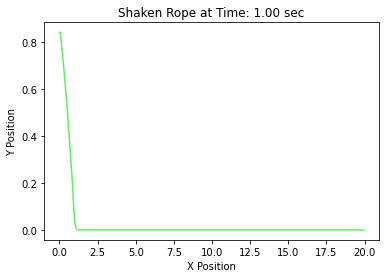

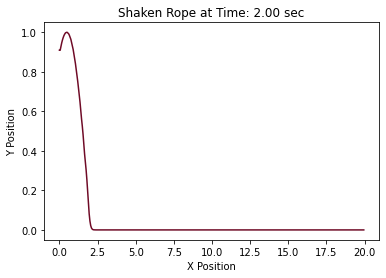

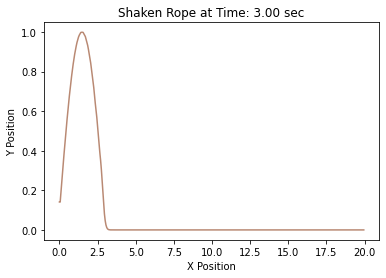

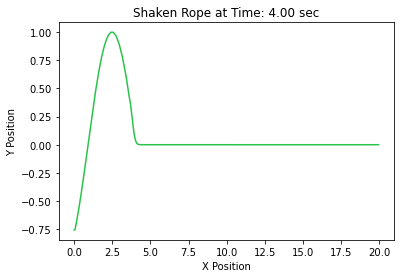

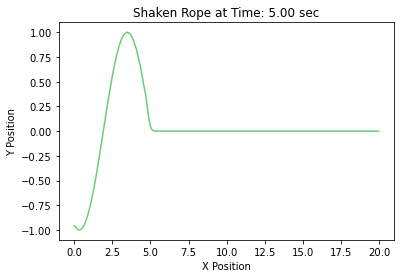

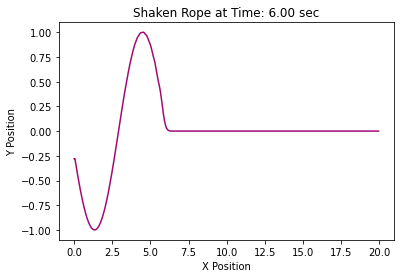

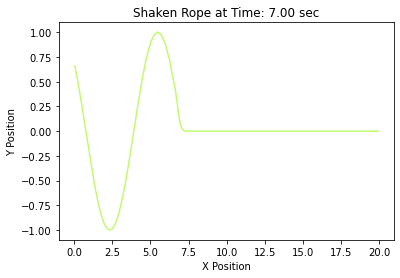

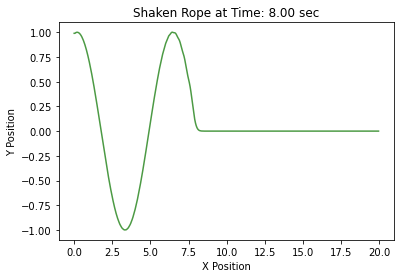

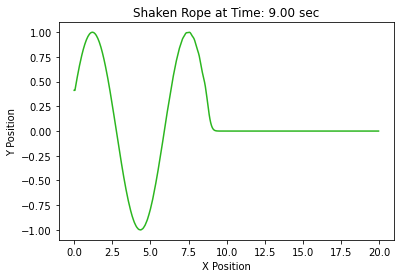

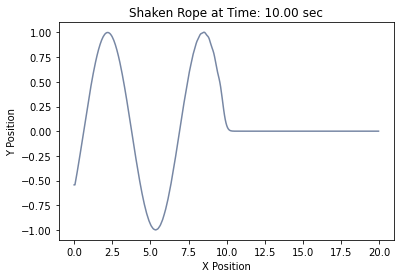

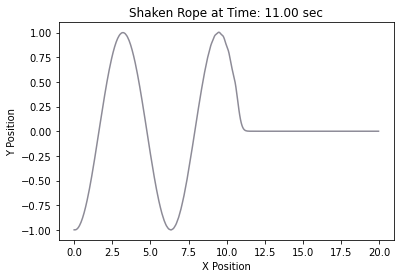

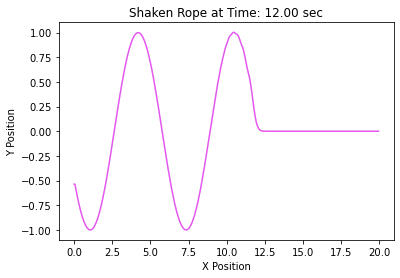

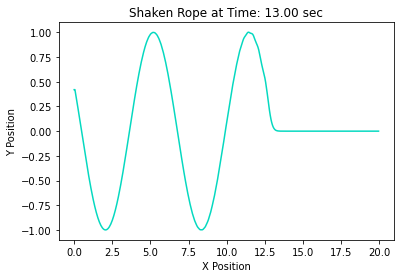

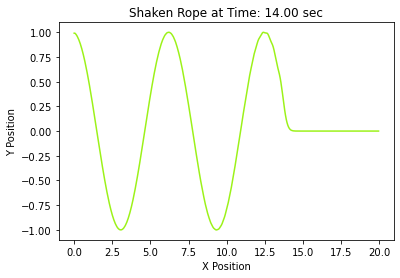

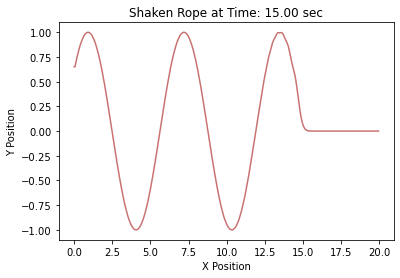

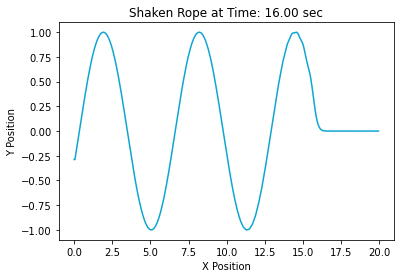

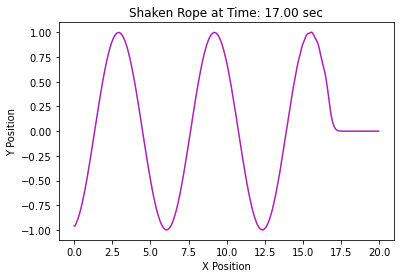

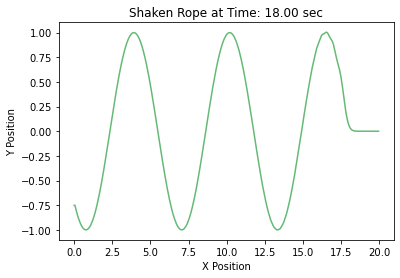

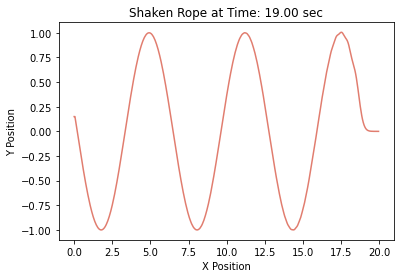

In [4]:
import random
# Given Steps
ℎ𝑡 = 0.01
ℎ𝑥 = 0.05
# Initalize the range for the first plot
xRange = 20
tRange = 20

# Function to plot the effect of shacking a rope for various time ranges
def shakeRope (tRange):  
    
    t = np.arange(0, tRange, ℎ𝑡)  # declare a time array using the range
    xpts = np.arange(0, xRange, ℎ𝑥)   # declare x points array
    
    # Create an array to hold all calculated displacement values (𝑢) for all positions and timesteps.
    dispAll = np.zeros([len(t), len(xpts)]) 
    
    for i in range (1, len(t) - 1): 
        dispAll[i, 0:2] = np.sin(t[i]) # calculate the bondary conditions for each loop
        
        for j in range (2, len(xpts) - 1):  
             dispAll[i+1, j] = (ht/hx)**2*(dispAll[i,j+1]+dispAll[i, j-1]-2*dispAll[i,j])+2*dispAll[i,j] - dispAll[i-1,j]
            
        if (i%100 == 0):   # only plot every 100 iterations
            numTime = t[i]
            rgb = (random.random(), random.random(), random.random()) # random color plot
            plt.plot(xpts, dispAll[i, :],c=(rgb))
            plt.title(f"Shaken Rope at Time: {numTime:.2f} sec")
            plt.xlabel('X Position')
            plt.ylabel('Y Position')
            plt.show()
            
    return dispAll


dispAll1 = shakeRope(20)

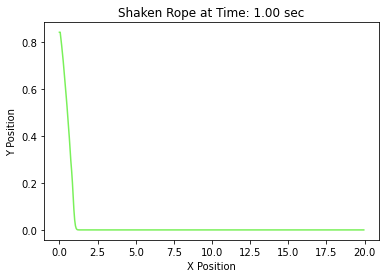

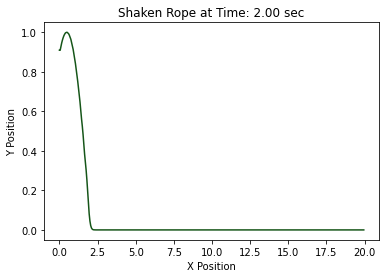

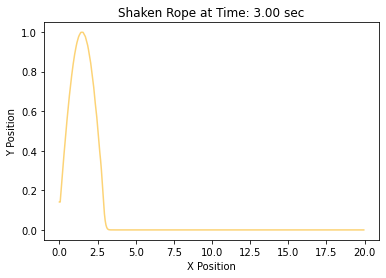

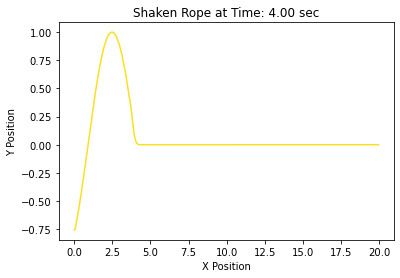

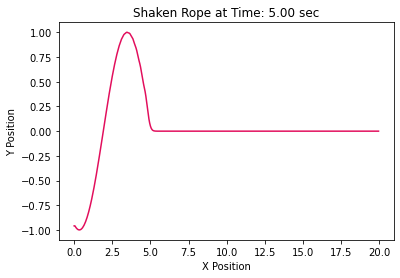

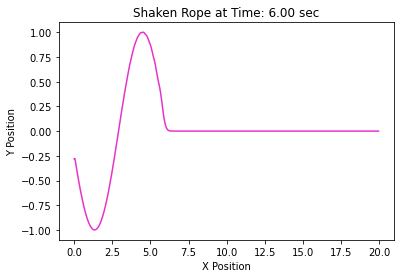

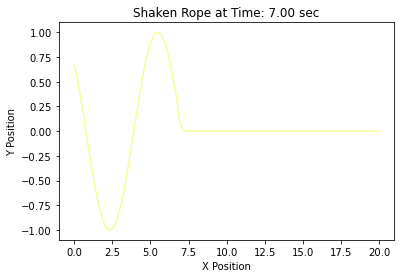

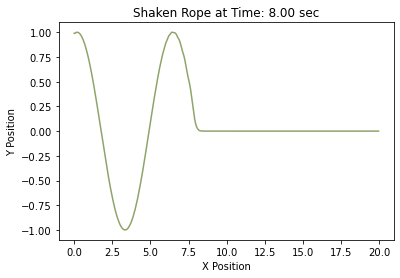

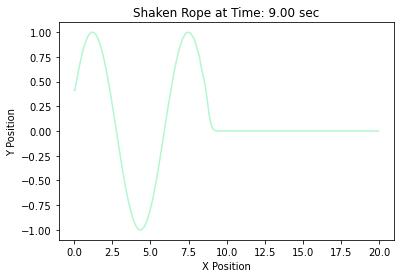

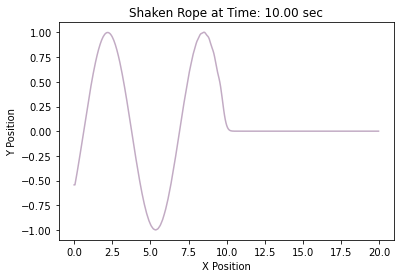

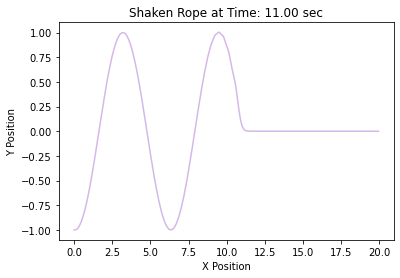

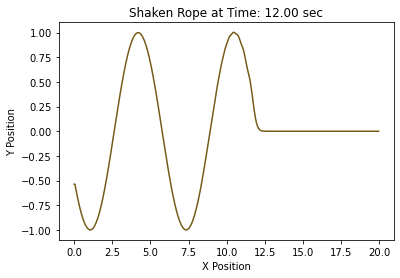

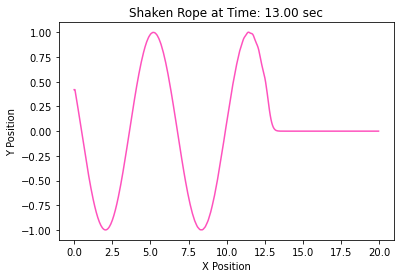

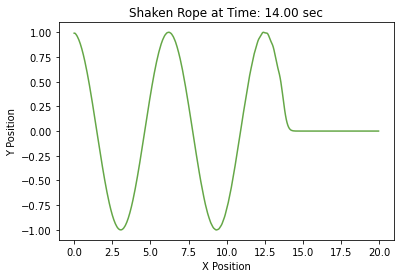

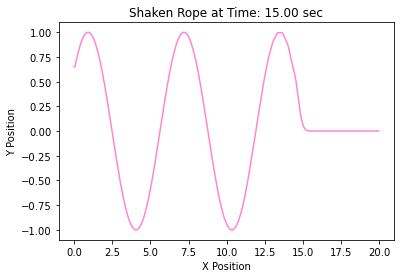

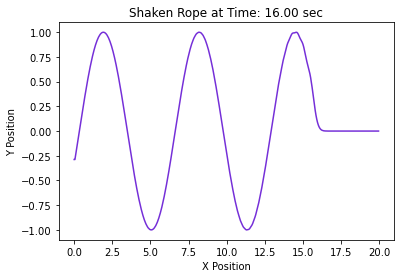

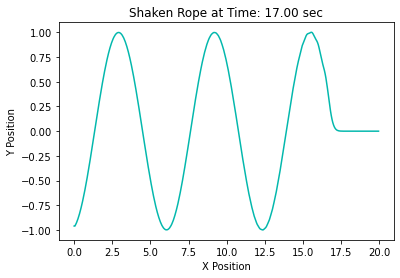

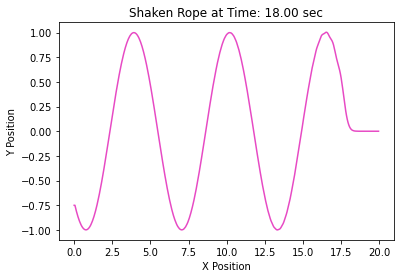

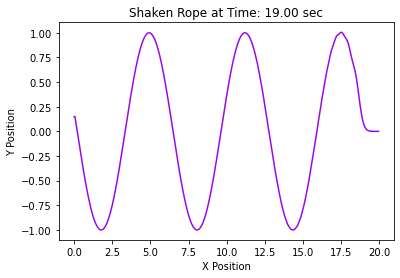

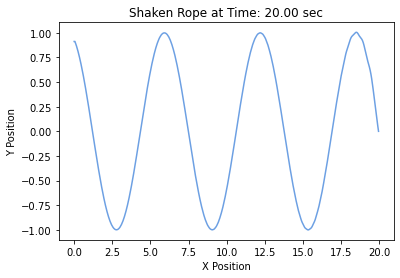

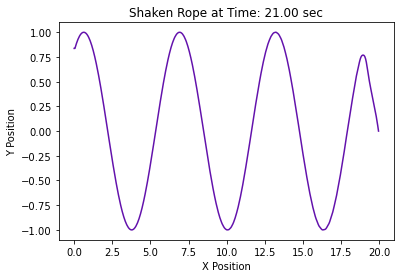

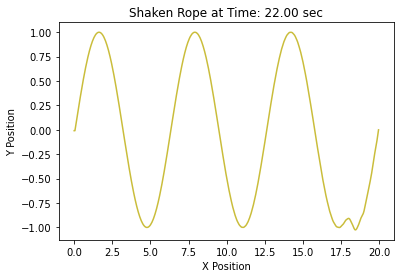

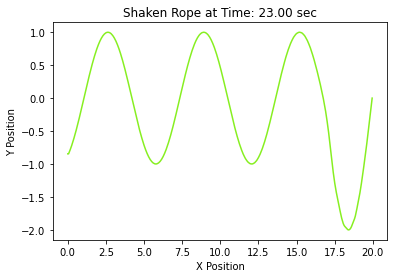

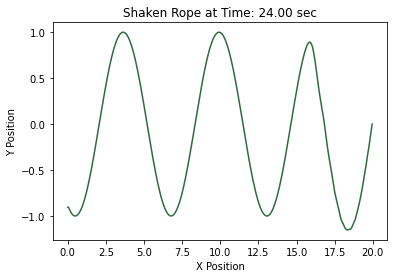

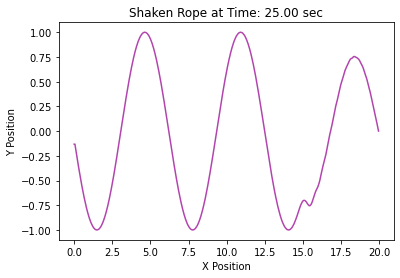

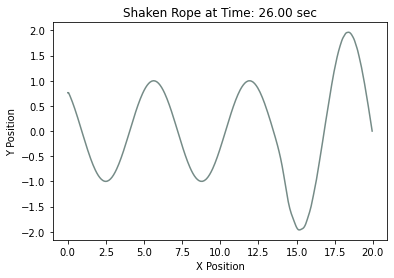

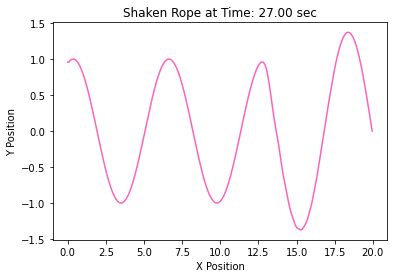

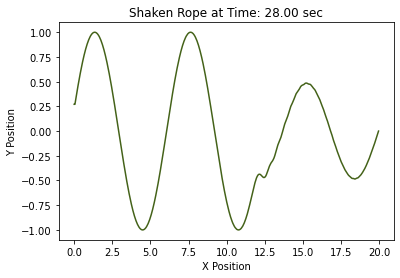

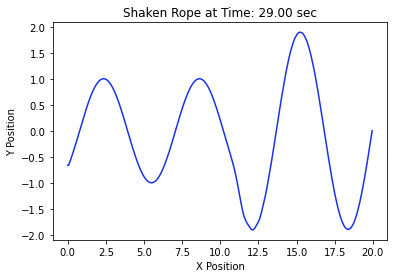

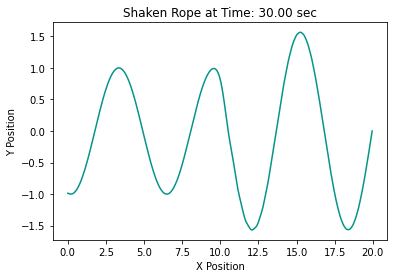

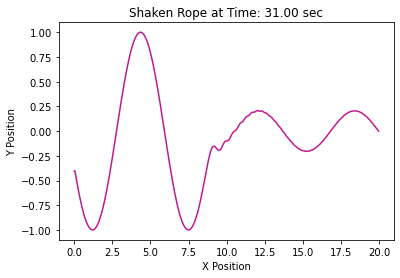

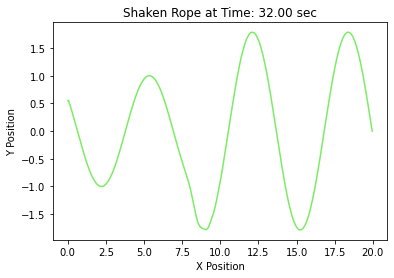

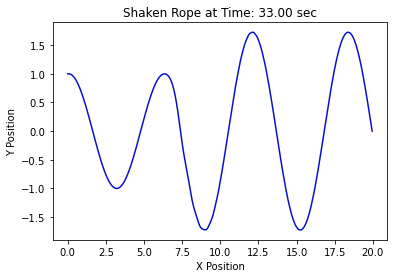

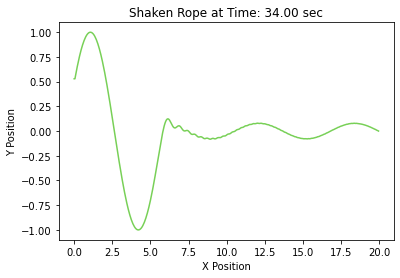

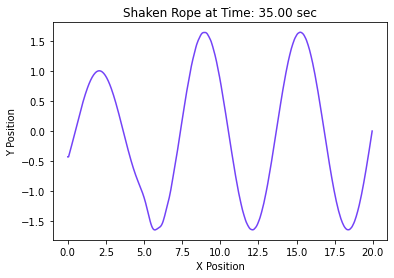

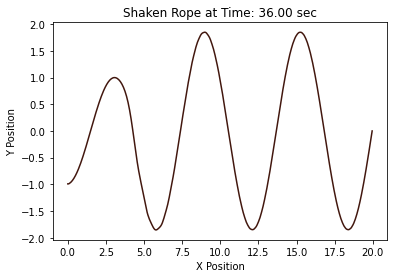

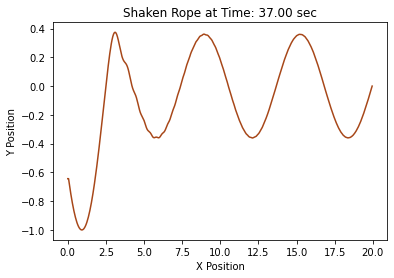

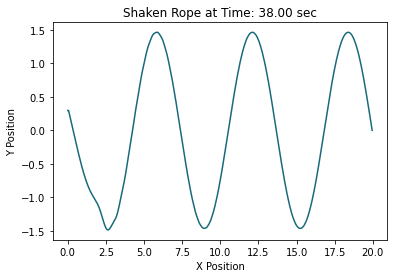

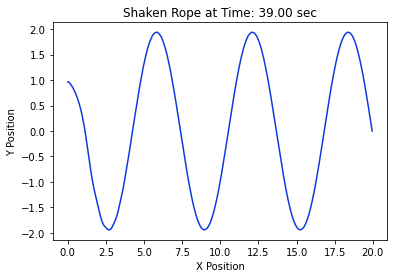

In [7]:
dispAll = shakeRope(40)  # Plot again with time up to 40 seconds


	Animation of the Rope Wave


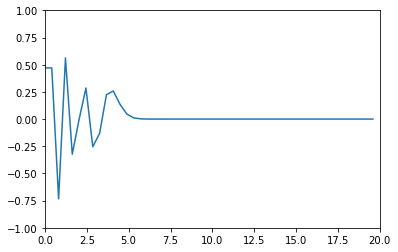

In [34]:
# attempt to animate the rope, Just for fun!
import matplotlib.animation


t = np.linspace(0,20) # really the x points
#y = np.sin(t) # dispAll[i, :]
xpts = np.arange(0, xRange, ℎ𝑥)   # declare x points array


for i in range (1, len(t) - 1): 
        dispAll[i, 0:2] = np.sin(t[i]) # calculate the bondary conditions for each loop
        
        for j in range (2, len(xpts) - 1):  
             dispAll[i+1, j] = (ht/hx)**2*(dispAll[i,j+1]+dispAll[i, j-1]-2*dispAll[i,j])+2*dispAll[i,j] - dispAll[i-1,j]

print("\tAnimation of the Rope Wave")
fig, ax = plt.subplots()
ax.axis([0,20,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], dispAll[i, :i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t*10))

from IPython.display import HTML
HTML(ani.to_jshtml())


## Comment on the Differences between the first 20 plot and the 40 second plot:

Starting at a time of 22 seconds the 2nd plot started to superimpose since the rope was reflecting of the bounds of the rope. The superposition meant that reflected waves were causing constructive and destructive interference at different times. For example at 34 seconds the reflected wave is highly destructive and causes the rope to mostly flatten. And at 26 seconds the rope has a very constructive interference with the reflected wave causing the amplitude at the end of the rope to go to about 2.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.

In [6]:
# All code was written by Nathan Pacey. Topics were discussed with Stuart Gaherty, Conner Legg and Ekin Yelken.